In [1]:
import cufflinks as cf
import numpy as np
import pandas as pd

cf.set_config_file(offline=True)

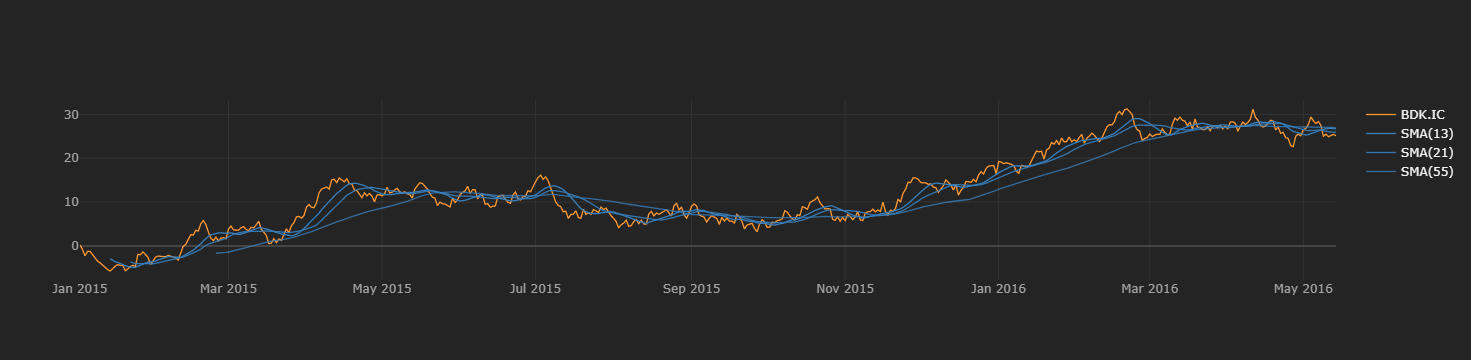

In [2]:
cf.datagen.lines(1, 500).ta_plot(study="sma", periods=[13, 21, 55])

In [3]:
from openpyxl import load_workbook

In [32]:
wb = load_workbook("1.xlsx")
sheets = wb.worksheets
sheet_point_list = sheets[0]
sheet_distance = sheets[1]
targetCamp = 'red'
enemyCamp = 'blue'

In [33]:
pointListAll = np.array(list(sheet_point_list.values)[1:])

pointMap = {}
for row in np.around(np.array(pointListAll[:, [0, 1, 2]], float), 2):
    pointMap[int(row[0])] = row

pointList = pointListAll[pointListAll[:, 3] == targetCamp]
pointList = pointList[:, [0, 1, 2]]
pointList = np.around(np.array(pointList, float), 2)

pointEnemyList = pointListAll[pointListAll[:, 3] == enemyCamp]
pointEnemyList = pointEnemyList[:, [0, 1, 2]]
pointEnemyList = np.around(np.array(pointEnemyList, float), 2)

In [34]:
df2 = pd.DataFrame(pointList, columns=["index", "X", "Y"])
df2

,index,X,Y
0,1.0,74.65,25.10
1,2.0,86.22,16.61
2,3.0,86.02,16.38
3,4.0,74.77,25.23
4,5.0,75.24,25.51
...,...,...,...
263,423.0,84.55,21.70
264,424.0,84.52,21.54
265,425.0,84.55,21.54
266,426.0,84.51,23.61


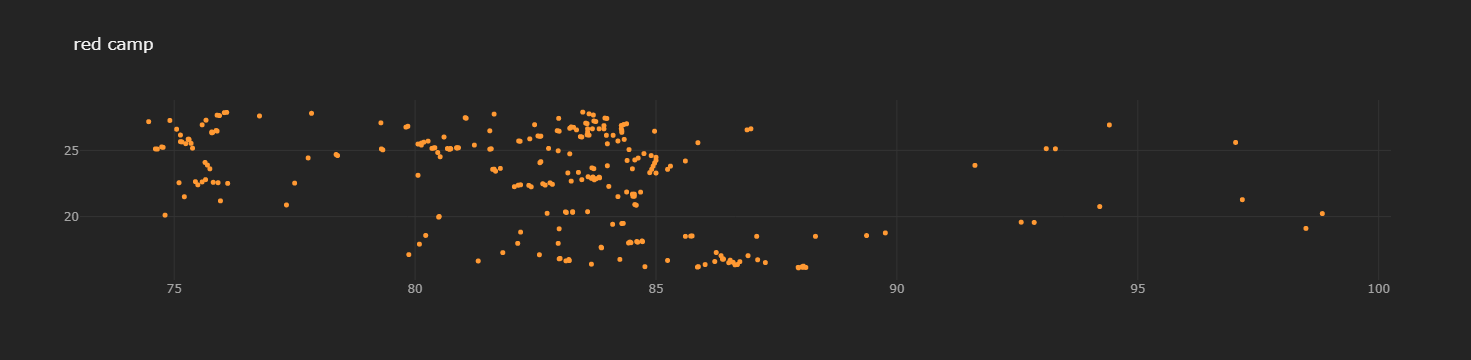

In [35]:
df2.iplot(
    kind="scatter", mode="markers", x="X", y="Y", size=5, text="index", title="red camp"
)

In [13]:
import matplotlib.pyplot as plt

In [50]:
plt.close()

plt.figure(dpi=800, figsize=(15, 8))
plt.title(f"{targetCamp} camp", fontsize=24)
plt.axis([70, 100, 0, 30])
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=14)
plt.scatter(pointList[:, 1], pointList[:, 2], color="r", s=0.1)
plt.scatter(pointEnemyList[:, 1], pointEnemyList[:, 2], color="b", s=0.1)
for row in pointList:
    plt.text(row[1], row[2], int(row[0]), fontsize=1)
for row in pointEnemyList:
    plt.text(row[1], row[2], int(row[0]), fontsize=1)

# plt.plot(pointList[:, 1], pointList[:, 2], color="b",linewidth=0.1)
for row in list(sheet_distance.values)[1:]:
    fromId = int(row[1])
    toId = int(row[2])
    x = [pointMap[fromId][1], pointMap[toId][1]]
    y = [pointMap[fromId][2], pointMap[toId][2]]
    plt.plot(x, y, color='b', linewidth=0.1)
plt.savefig('./img.png')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x = [[1, 3, 2, 5]]  # 要连接的点的x坐标序列
y = [[4, 7, 6, 3]]  # 要连接的点的y坐标序列

for i in range(len(x)):

    plt.plot(x[i], y[i], color="r")
    plt.scatter(x[i], y[i], color="b")

plt.show()